In [1]:
from helpers import *
from plot_helpers import *
from sklearn.model_selection import train_test_split
from timer import Timer

In [2]:
index_ = "L20"

In [3]:
size = 20*20
samples = 1000

dtypes = dict([(i, np.int8) for i in range(1,size+1)])
dtypes[0]=np.float32

rawL20 = pd.read_csv("../data/DataBool_C_L20_MCS200000_WT20000.txt", sep=" ", header=None, dtype=dtypes)
# prepare data
X, Y, val_set = base_prepare(rawL20,
                             exportLabels = True,
                             normalize_data = False,
                             select_val_set=True,
                             nsamples=samples,
                             index_=index_,
                             save=False)

In [4]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle=True)
print("X_train_size: ", X_train.shape)
print("X_test_size: ", X_test.shape)
print("Y_train_size: ", Y_train.shape)
print("Y_test_size: ", Y_test.shape)

X_train_size:  (281740, 400)
X_test_size:  (70436, 400)
Y_train_size:  (281740, 2)
Y_test_size:  (70436, 2)


In [5]:
num_classes = 2
epochs = 100
batch_size = 400

input_shape = (X_train.shape[1],)

In [6]:
# Define Callbacks
# Initializing callbacks
path = f"./model_{index_}.h5"

# Saves the model in-between epochs when there is an improvement in "val_loss"
checkpoint = ModelCheckpoint(path,
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in "val_loss" is observed after set "patience"
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 6,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors "val_loss" for a set 'patience', then the learning rate is reduced by a factor specified manually.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              patience = 4, verbose=1,
                              factor=0.3)


callbacks = [checkpoint, earlystop, reduce_lr]
# callbacks = [checkpoint, reduce_lr]


METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
]

In [7]:
model1 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model1.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)
history1 = model1.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, Y_test), 
                    callbacks=callbacks)

Epoch 1/100
705/705 [==============================] - 9s 11ms/step - loss: 8.5119 - categorical_accuracy: 0.9369 - val_loss: 0.1541 - val_categorical_accuracy: 0.9701

Epoch 00001: val_loss improved from inf to 0.15410, saving model to .\model_L20.h5
Epoch 2/100
705/705 [==============================] - 6s 9ms/step - loss: 0.1466 - categorical_accuracy: 0.9711 - val_loss: 0.1334 - val_categorical_accuracy: 0.9690

Epoch 00002: val_loss improved from 0.15410 to 0.13338, saving model to .\model_L20.h5
Epoch 3/100
705/705 [==============================] - 7s 9ms/step - loss: 0.1282 - categorical_accuracy: 0.9733 - val_loss: 0.1174 - val_categorical_accuracy: 0.9727

Epoch 00003: val_loss improved from 0.13338 to 0.11743, saving model to .\model_L20.h5
Epoch 4/100
705/705 [==============================] - 7s 9ms/step - loss: 0.1169 - categorical_accuracy: 0.9740 - val_loss: 0.1223 - val_categorical_accuracy: 0.9698

Epoch 00004: val_loss did not improve from 0.11743
Epoch 5/100
705/705


Epoch 00068: val_loss improved from 0.07350 to 0.07331, saving model to .\model_L20.h5
Epoch 69/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0731 - categorical_accuracy: 0.9768 - val_loss: 0.0738 - val_categorical_accuracy: 0.9770

Epoch 00069: val_loss did not improve from 0.07331
Epoch 70/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0725 - categorical_accuracy: 0.9769 - val_loss: 0.0732 - val_categorical_accuracy: 0.9770

Epoch 00070: val_loss improved from 0.07331 to 0.07324, saving model to .\model_L20.h5
Epoch 71/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0721 - categorical_accuracy: 0.9771 - val_loss: 0.0737 - val_categorical_accuracy: 0.9767

Epoch 00071: val_loss did not improve from 0.07324
Epoch 72/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0721 - categorical_accuracy: 0.9767 - val_loss: 0.0730 - val_categorical_accuracy: 0.9768

Epoch 00072: val_loss improved from 0.07324 to 

In [8]:
def plot_history(history, metric_names=["categorical_accuracy", "loss"], filename = "", figsize=(20, 7)):
    """
    plot and saves history from model history
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.ravel()
    historyDataFrame = pd.DataFrame()
    metrics = metric_names
    for i, met in enumerate(metrics):
        historyDataFrame[met] = history.history[met]
        historyDataFrame["val_" + met] = history.history["val_" + met]
        ax[i].plot(history.history[met])
        ax[i].plot(history.history["val_" + met])
        ax[i].set_title("Model {}".format(met))
        ax[i].set_xlabel("epochs")
        ax[i].set_ylabel(met)
        ax[i].legend(["train", "val"])
    if filename:
        historyDataFrame.to_csv(filename)

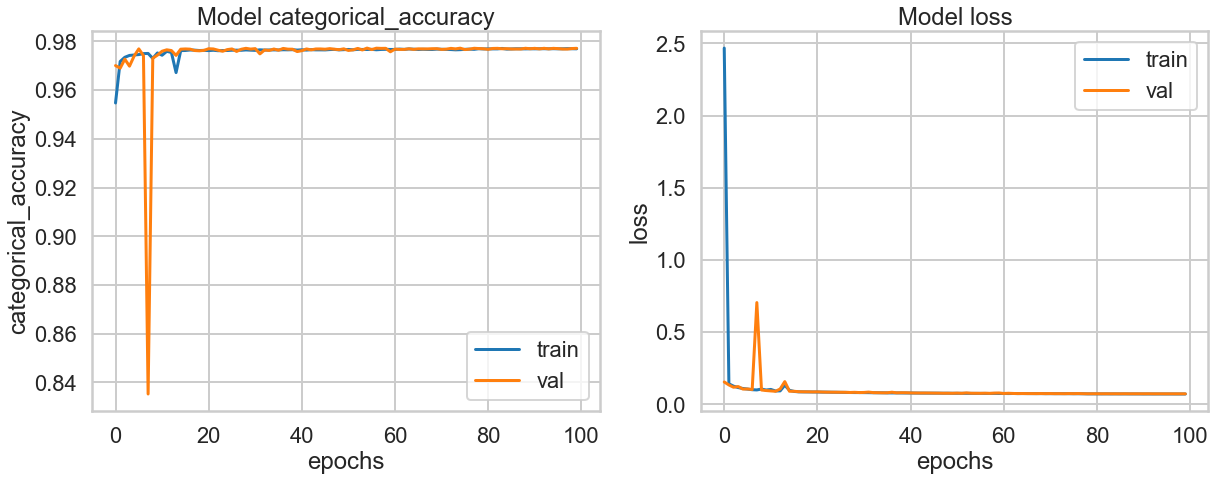

In [10]:
plot_history(history1)

In [11]:
val_loss, val_acc = model1.evaluate(x=X_test, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 6ms/step - loss: 0.0719 - categorical_accuracy: 0.9771
Validation loss: 0.0719
Validation accuracy: 0.977


In [12]:
df_pred20 = generate_predictions(val_set, model1, f"predictions_{index_}.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


# PCA --> 2 components

In [7]:
from sklearn.decomposition import IncrementalPCA

In [14]:
pca = IncrementalPCA(2)
pca.fit(X_train)

IncrementalPCA(n_components=2)

In [15]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
pca.explained_variance_ratio_

array([0.37707073, 0.01253241])

In [17]:
X_train_pca = X_train_pca.astype(np.float32)
X_test_pca = X_test_pca.astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 9ms/step - loss: 4.0417 - categorical_accuracy: 0.9678 - val_loss: 0.1273 - val_categorical_accuracy: 0.9698

Epoch 00001: val_loss did not improve from 0.07186
Epoch 2/100
705/705 [==============================] - 6s 9ms/step - loss: 0.1212 - categorical_accuracy: 0.9725 - val_loss: 0.1061 - val_categorical_accuracy: 0.9756

Epoch 00002: val_loss did not improve from 0.07186
Epoch 3/100
705/705 [==============================] - 6s 9ms/step - loss: 0.1042 - categorical_accuracy: 0.9745 - val_loss: 0.1095 - val_categorical_accuracy: 0.9721

Epoch 00003: val_loss did not improve from 0.07186
Epoch 4/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0972 - categorical_accuracy: 0.9744 - val_loss: 0.0940 - val_categorical_accuracy: 0.9754

Epoch 00004: val_loss did not improve from 0.07186
Epoch 5/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0929 - categorical_accuracy: 0.9747 - val_loss:

705/705 [==============================] - 6s 8ms/step - loss: 0.0701 - categorical_accuracy: 0.9763 - val_loss: 0.0707 - val_categorical_accuracy: 0.9770

Epoch 00037: val_loss improved from 0.07085 to 0.07070, saving model to .\model_L20.h5
Epoch 38/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0699 - categorical_accuracy: 0.9768 - val_loss: 0.0705 - val_categorical_accuracy: 0.9767

Epoch 00038: val_loss improved from 0.07070 to 0.07055, saving model to .\model_L20.h5
Epoch 39/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0707 - categorical_accuracy: 0.9761 - val_loss: 0.0705 - val_categorical_accuracy: 0.9769

Epoch 00039: val_loss improved from 0.07055 to 0.07054, saving model to .\model_L20.h5
Epoch 40/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0697 - categorical_accuracy: 0.9764 - val_loss: 0.0706 - val_categorical_accuracy: 0.9770

Epoch 00040: val_loss did not improve from 0.07054
Epoch 41/100
705/705 [===

In [18]:
val_loss, val_acc = model2.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 6ms/step - loss: 0.0703 - categorical_accuracy: 0.9770
Validation loss: 0.0703
Validation accuracy: 0.977


In [19]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred20_pca = generate_predictions(val_set, val_set_pca, model2, f"predictions_{index_}_PCA.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


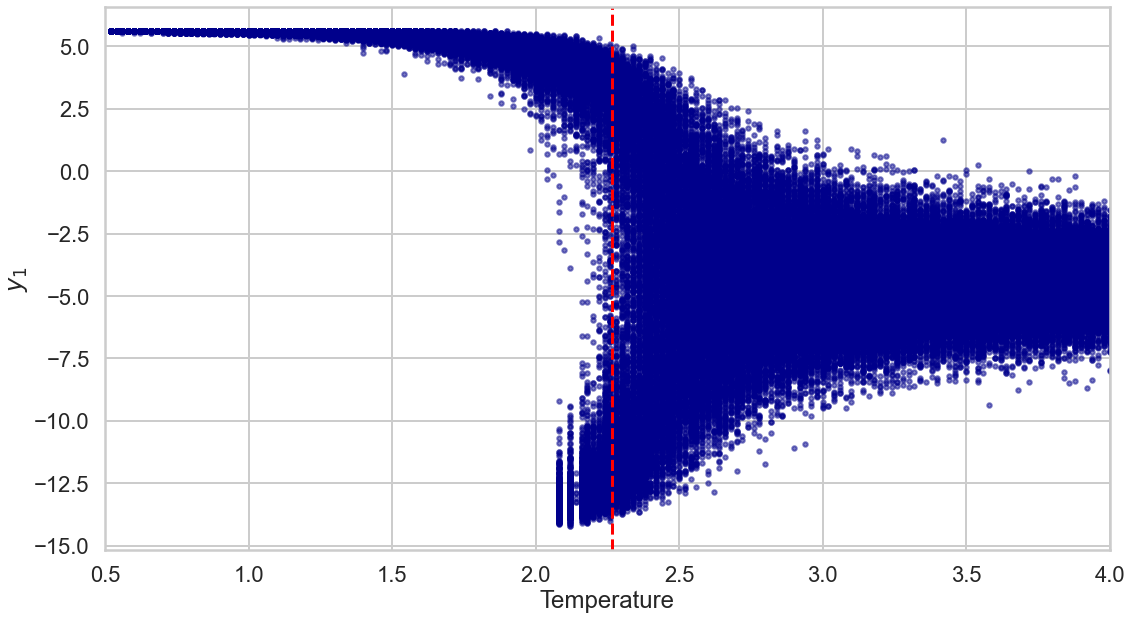

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,0], s=20, color="darkblue", alpha=0.5)
ax.set_ylabel(r"$y_1$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="red")
plt.savefig(f"pca_{index_}_1st_comp_on_temperature.svg", bbox_inches="tight")

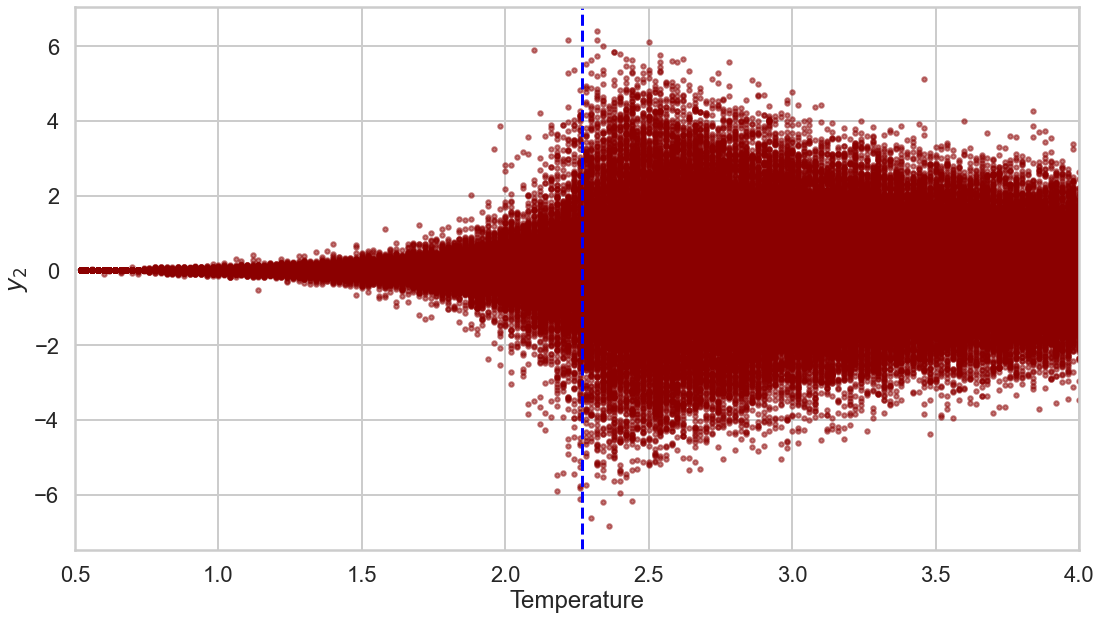

In [21]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,1], s=20, color="darkred", alpha=0.5)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="blue")
plt.savefig(f"pca_{index_}_2nd_comp_on_temperature.svg", bbox_inches="tight")

In [22]:
df = pd.DataFrame()
df["Temperature"] = val_set.iloc[:,0]
df["1st component"] = val_set_pca[:,0]
df["2nd component"] = val_set_pca[:,1]
df.to_csv(f"projections_{index_}.csv")

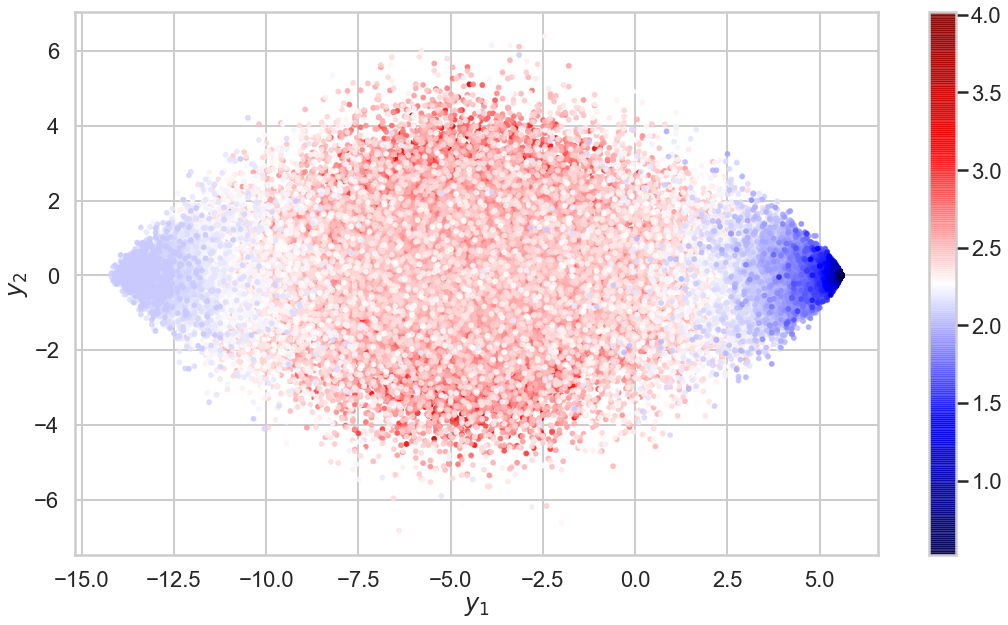

In [24]:
fig, ax = plt.subplots(figsize=(18,10))
p = ax.scatter(df["1st component"], df["2nd component"], c=df["Temperature"], cmap="seismic", s=15, alpha=0.8)
plt.colorbar(p)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel(r"$y_1$")
plt.savefig(f"pca_{index_}_projections.png", bbox_inches="tight")

# PCA --> 50 comp

In [8]:
components = 50

pca = IncrementalPCA(components)
pca.fit(X_train)

X_train_pca = pca.transform(X_train).astype(np.float32)
X_test_pca = pca.transform(X_test).astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 9ms/step - loss: 5.6523 - categorical_accuracy: 0.9573 - val_loss: 0.1270 - val_categorical_accuracy: 0.9660

Epoch 00001: val_loss improved from inf to 0.12702, saving model to .\model_L20.h5
Epoch 2/100
705/705 [==============================] - 5s 8ms/step - loss: 0.1195 - categorical_accuracy: 0.9731 - val_loss: 0.1099 - val_categorical_accuracy: 0.9690

Epoch 00002: val_loss improved from 0.12702 to 0.10994, saving model to .\model_L20.h5
Epoch 3/100
705/705 [==============================] - 6s 8ms/step - loss: 0.1069 - categorical_accuracy: 0.9737 - val_loss: 0.1065 - val_categorical_accuracy: 0.9648

Epoch 00003: val_loss improved from 0.10994 to 0.10649, saving model to .\model_L20.h5
Epoch 4/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0997 - categorical_accuracy: 0.9745 - val_loss: 0.1015 - val_categorical_accuracy: 0.9724

Epoch 00004: val_loss improved from 0.10649 to 0.10154, saving model to


Epoch 00034: val_loss did not improve from 0.07250
Epoch 35/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0721 - categorical_accuracy: 0.9764 - val_loss: 0.0723 - val_categorical_accuracy: 0.9766

Epoch 00035: val_loss improved from 0.07250 to 0.07225, saving model to .\model_L20.h5
Epoch 36/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0707 - categorical_accuracy: 0.9767 - val_loss: 0.0723 - val_categorical_accuracy: 0.9767

Epoch 00036: val_loss did not improve from 0.07225
Epoch 37/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0715 - categorical_accuracy: 0.9763 - val_loss: 0.0721 - val_categorical_accuracy: 0.9768

Epoch 00037: val_loss improved from 0.07225 to 0.07207, saving model to .\model_L20.h5
Epoch 38/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0705 - categorical_accuracy: 0.9767 - val_loss: 0.0733 - val_categorical_accuracy: 0.9752

Epoch 00038: val_loss did not improve from 0.07

705/705 [==============================] - 9s 13ms/step - loss: 0.0697 - categorical_accuracy: 0.9764 - val_loss: 0.0703 - val_categorical_accuracy: 0.9769

Epoch 00069: val_loss did not improve from 0.07028

Epoch 00069: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
Epoch 70/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0688 - categorical_accuracy: 0.9770 - val_loss: 0.0702 - val_categorical_accuracy: 0.9768

Epoch 00070: val_loss improved from 0.07028 to 0.07023, saving model to .\model_L20.h5
Epoch 71/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0693 - categorical_accuracy: 0.9769 - val_loss: 0.0702 - val_categorical_accuracy: 0.9768

Epoch 00071: val_loss improved from 0.07023 to 0.07021, saving model to .\model_L20.h5
Epoch 72/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0684 - categorical_accuracy: 0.9769 - val_loss: 0.0702 - val_categorical_accuracy: 0.9769

Epoch 00072: val_loss did n

In [9]:
val_loss, val_acc = model2.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0702 - categorical_accuracy: 0.9768
Validation loss: 0.0702
Validation accuracy: 0.977


In [10]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred20_pca = generate_predictions(val_set, val_set_pca, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


# PCA --> 250 components

In [11]:
components = 250

pca = IncrementalPCA(components)
pca.fit(X_train)

X_train_pca = pca.transform(X_train).astype(np.float32)
X_test_pca = pca.transform(X_test).astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 9ms/step - loss: 7.7719 - categorical_accuracy: 0.9667 - val_loss: 0.1327 - val_categorical_accuracy: 0.9679

Epoch 00001: val_loss did not improve from 0.07021
Epoch 2/100
705/705 [==============================] - 6s 8ms/step - loss: 0.1253 - categorical_accuracy: 0.9727 - val_loss: 0.1161 - val_categorical_accuracy: 0.9726

Epoch 00002: val_loss did not improve from 0.07021
Epoch 3/100
705/705 [==============================] - 6s 8ms/step - loss: 0.1120 - categorical_accuracy: 0.9731 - val_loss: 0.1074 - val_categorical_accuracy: 0.9745

Epoch 00003: val_loss did not improve from 0.07021
Epoch 4/100
705/705 [==============================] - 6s 8ms/step - loss: 0.1047 - categorical_accuracy: 0.9742 - val_loss: 0.1014 - val_categorical_accuracy: 0.9748

Epoch 00004: val_loss did not improve from 0.07021
Epoch 5/100
705/705 [==============================] - 6s 8ms/step - loss: 0.1001 - categorical_accuracy: 0.9745 - val_loss:

705/705 [==============================] - 6s 9ms/step - loss: 0.0714 - categorical_accuracy: 0.9764 - val_loss: 0.0727 - val_categorical_accuracy: 0.9763

Epoch 00038: val_loss did not improve from 0.07021
Epoch 39/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0716 - categorical_accuracy: 0.9767 - val_loss: 0.0721 - val_categorical_accuracy: 0.9769

Epoch 00039: val_loss did not improve from 0.07021
Epoch 40/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0710 - categorical_accuracy: 0.9765 - val_loss: 0.0729 - val_categorical_accuracy: 0.9769

Epoch 00040: val_loss did not improve from 0.07021
Epoch 41/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0713 - categorical_accuracy: 0.9765 - val_loss: 0.0722 - val_categorical_accuracy: 0.9766

Epoch 00041: val_loss did not improve from 0.07021
Epoch 42/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0711 - categorical_accuracy: 0.9766 - val_loss: 0.0736 

705/705 [==============================] - 6s 9ms/step - loss: 0.0676 - categorical_accuracy: 0.9772 - val_loss: 0.0708 - val_categorical_accuracy: 0.9768

Epoch 00073: val_loss did not improve from 0.07021
Epoch 74/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0685 - categorical_accuracy: 0.9770 - val_loss: 0.0708 - val_categorical_accuracy: 0.9768

Epoch 00074: val_loss did not improve from 0.07021

Epoch 00074: ReduceLROnPlateau reducing learning rate to 6.561000276406048e-08.
Epoch 75/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0690 - categorical_accuracy: 0.9768 - val_loss: 0.0708 - val_categorical_accuracy: 0.9768

Epoch 00075: val_loss did not improve from 0.07021
Epoch 76/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0684 - categorical_accuracy: 0.9773 - val_loss: 0.0708 - val_categorical_accuracy: 0.9768

Epoch 00076: val_loss did not improve from 0.07021
Restoring model weights from the end of the best epo

In [12]:
val_loss, val_acc = model2.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 8ms/step - loss: 0.0708 - categorical_accuracy: 0.9768
Validation loss: 0.0708
Validation accuracy: 0.977


In [13]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred20_pca = generate_predictions(val_set, val_set_pca, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 2s 3ms/step
